In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("./bitcoinfinal.csv", header=None)
df.columns = ['month', 'price']
df = df.set_index('month')
df

,price
month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


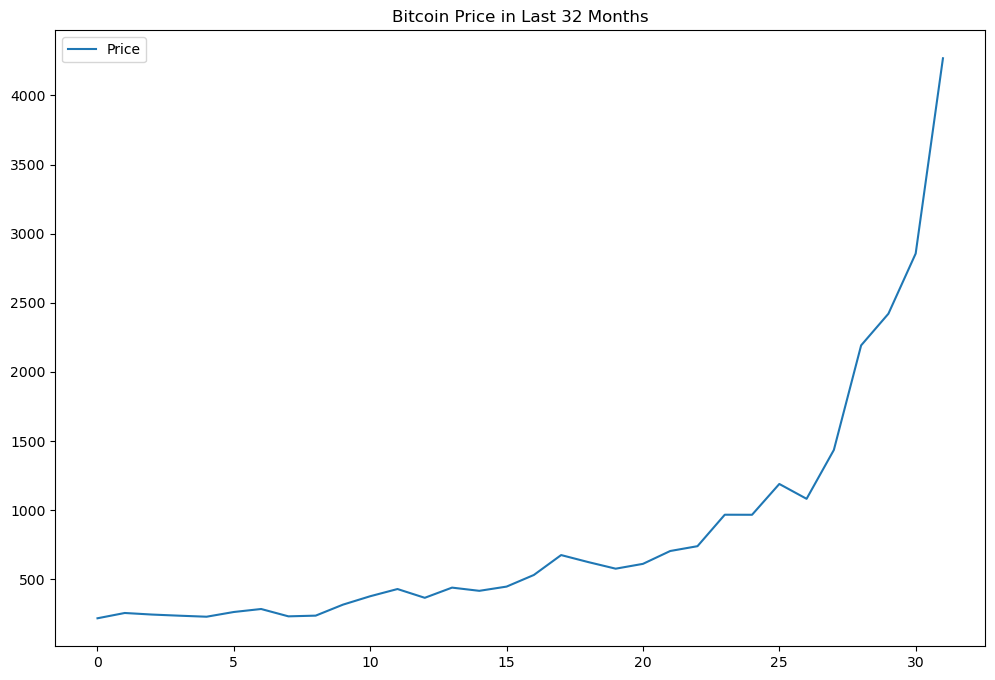

In [39]:
plt.figure(figsize=[12,8])
plt.plot(df['price'], label='Price')
plt.legend(loc='best')
plt.title("Bitcoin Price in Last 32 Months")
plt.show()

##### Divide the Data into Train & Test Dataset

In [40]:
train_len = 29
train = df[:train_len]
test = df[train_len:]

##### Time Series Decomposition

In [41]:
from pylab import rcParams
import statsmodels.api as sm

In [42]:
# rcParams['figure.figsize'] = 12,8
# decomposition = sm.tsa.seasonal_decompose(df.price, model='additive')
# fig = decomposition.plot()
# plt.show()

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

#### Simple Exponential Smoothing Method

In [44]:
model = SimpleExpSmoothing(np.asarray(train['price']))
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.995, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 217.4, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


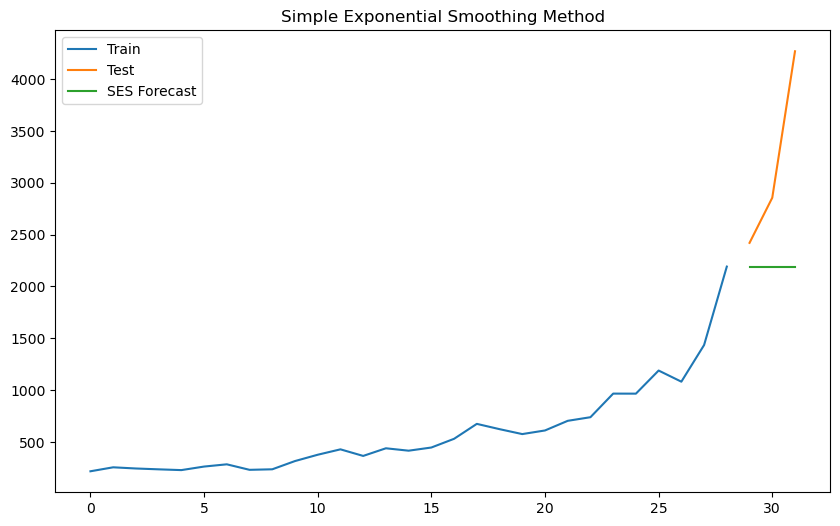

In [45]:
plt.figure(figsize=[10,6])
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_ses["ses_forecast"])).round(2)
mape = (np.mean(np.abs(test['price']-y_hat_ses['ses_forecast'])/test['price'])*100).round(2)

results = pd.DataFrame({
    "Method" : ["Simple Exponential Smoothing"],
    "mape" : [mape],
    "rmse" : [rmse]
})
results

,Method,mape,rmse
0,Simple Exponential Smoothing,27.25,1268.86


#### Holt's Exponential Method

In [52]:
model = ExponentialSmoothing(np.asarray(train['price']), trend='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['Holt\'s Forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.995, 'smoothing_trend': 0.2605952380952381, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 1.0236489524323353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


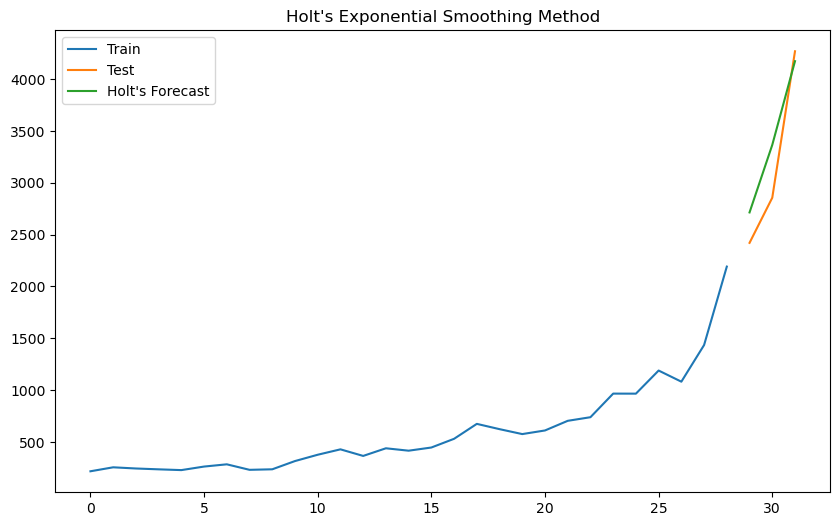

In [53]:
plt.figure(figsize=[10,6])
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_holt['Holt\'s Forecast'], label='Holt\'s Forecast')
plt.legend(loc='best')
plt.title("Holt\'s Exponential Smoothing Method")
plt.show()

In [49]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_holt['Holt\'s Forecast'])).round(2)
mape = (np.mean(np.abs(test['price']-y_hat_holt['Holt\'s Forecast'])/test['price'])*100).round(2)

tempResults = pd.DataFrame({
    "Method" : ["Holt\'s Exponential Smoothing"],
    "mape" : [mape],
    "rmse" : [rmse]
})
results = pd.concat([results, tempResults])
results

,Method,mape,rmse
0,Simple Exponential Smoothing,27.25,1268.86
0,Holt's Exponential Smoothing,10.74,344.03


#### Holt's Winter Exponential Method

In [66]:
model = ExponentialSmoothing(np.asarray(train['price']), trend='mul', seasonal_periods=3)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.995, 'smoothing_trend': 0.2605952380952381, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 1.0236489524323353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


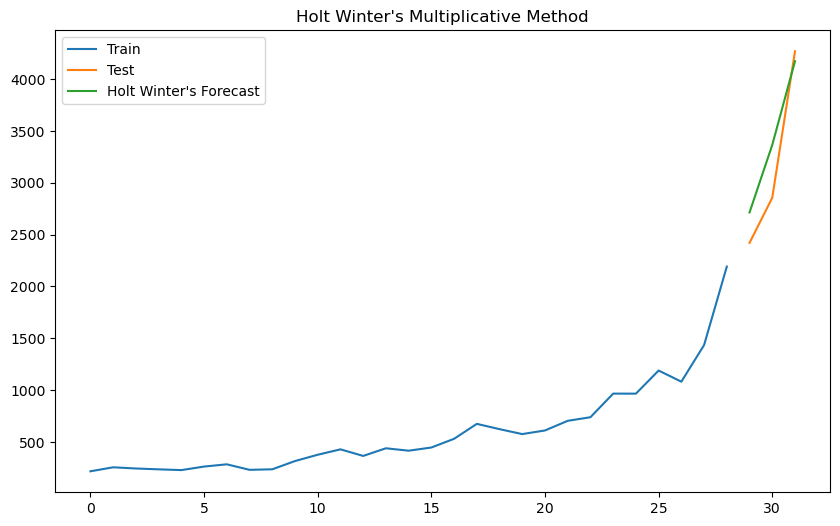

In [67]:
plt.figure(figsize=[10,6])
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winter\'s Forecast')
plt.legend(loc='best')
plt.title("Holt Winter\'s Multiplicative Method")
plt.show()

In [68]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_hwm['hwm_forecast'])).round(2)
mape = (np.mean(np.abs(test['price']-y_hat_hwm['hwm_forecast'])/test['price'])*100).round(2)

tempResults = pd.DataFrame({
    "Method" : ["Holt Winter\'s Multiplicative Method"],
    "mape" : [mape],
    "rmse" : [rmse]
})
results = pd.concat([results, tempResults])
results

,Method,mape,rmse
0,Simple Exponential Smoothing,27.25,1268.86
0,Holt's Exponential Smoothing,10.74,344.03
0,Holt Winter's Method,10.74,344.03
0,Holt Winter's Additive Method,10.99,497.91
0,Holt Winter's Multiplicative Method,10.74,344.03


In [59]:
train['price'][train_len-1]

2191.8